In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

**Data collection and cleaning**

In [75]:
bitc_price = yf.Ticker('BTC-USD')

In [76]:
bitc_price.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,472,225. The last known price of Bitcoin is 27,215.88119594 USD and is down -0.75 over the last 24 hours. It is currently trading on 10437 active market(s) with $14,237,152,644.25 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 27298.703,
 'open': 27298.703,
 'dayLow': 27184.553,
 'dayHigh': 27298.703,
 'regularMarketPreviousClose': 27298.703,
 'regularMarketOpen': 27298.703,
 'regularMarketDayLow': 27184.553,
 'regularMarketDayHigh': 27298.703,
 'volume': 14128071680,
 'regularMarketVolume': 14128071680,
 'averageVolume': 14057313512,
 'averageVolume10days': 13249458475,
 'averageDailyVolume10Day': 13249458475,
 'marketCap': 529723981824,
 'fiftyTwoWeekLow': 15599.047,
 'fiftyTwoWeekHi

In [77]:
bitc_df = bitc_price.history(period = '5y')

In [78]:
bitc_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-31 00:00:00+00:00,6973.970215,7057.169922,6920.160156,7037.580078,4495650000,0.0,0.0
2018-09-01 00:00:00+00:00,7044.810059,7242.290039,7038.049805,7193.250000,4116050000,0.0,0.0
2018-09-02 00:00:00+00:00,7189.580078,7306.310059,7132.160156,7272.720215,4329540000,0.0,0.0
2018-09-03 00:00:00+00:00,7279.029785,7317.939941,7208.149902,7260.060059,4087760000,0.0,0.0
2018-09-04 00:00:00+00:00,7263.000000,7388.259766,7255.439941,7361.660156,4273640000,0.0,0.0


In [79]:
bitc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2018-08-31 00:00:00+00:00 to 2023-08-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1827 non-null   float64
 1   High          1827 non-null   float64
 2   Low           1827 non-null   float64
 3   Close         1827 non-null   float64
 4   Volume        1827 non-null   int64  
 5   Dividends     1827 non-null   float64
 6   Stock Splits  1827 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.2 KB


In [80]:
bitc_df.drop(['Dividends', 'Stock Splits'], axis = 1, inplace= True)

In [81]:
bitc_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-27 00:00:00+00:00,26008.242188,26165.373047,25965.097656,26089.693359,6913768611
2023-08-28 00:00:00+00:00,26089.615234,26198.578125,25880.599609,26106.150391,11002805166
2023-08-29 00:00:00+00:00,26102.486328,28089.337891,25912.628906,27727.392578,29368391712
2023-08-30 00:00:00+00:00,27726.083984,27760.160156,27069.207031,27297.265625,16343655235
2023-08-31 00:00:00+00:00,27298.703125,27298.703125,27184.552734,27203.966797,14128071680


In [82]:
bitc_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

**Analyse Bitcoin share price**

stock price of Open/ High/ Low/Close

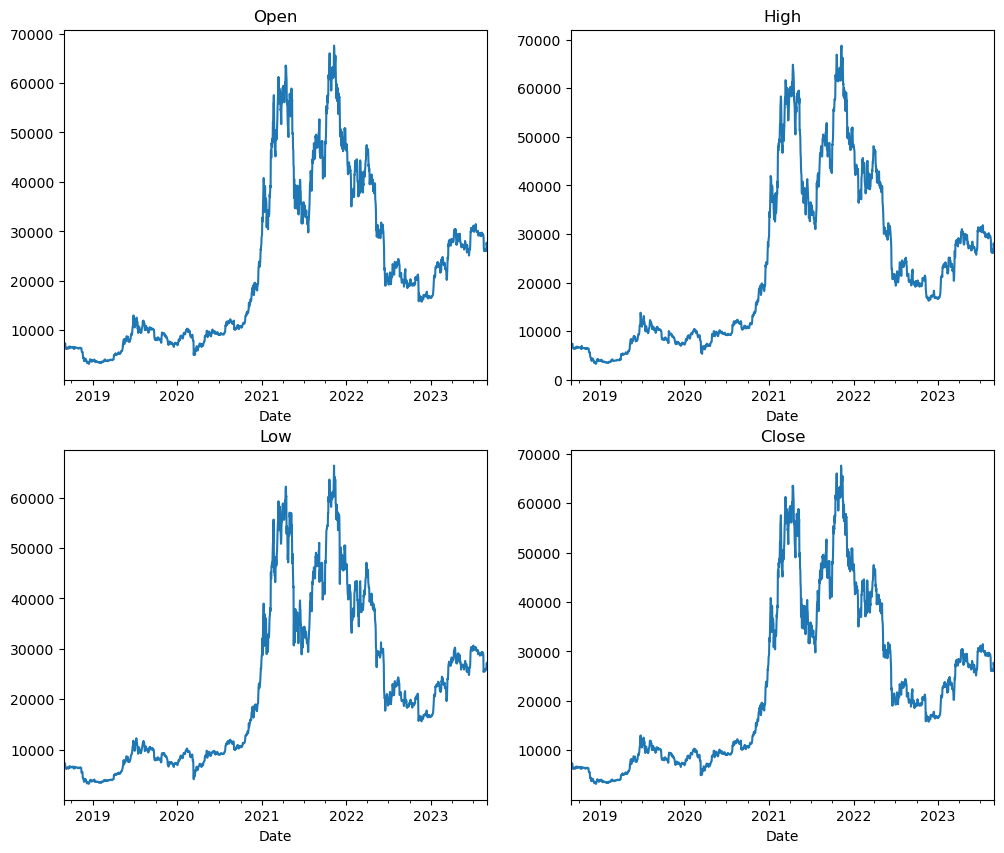

In [83]:
plt.figure(figsize = (12,10))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    bitc_df[col].plot()
    plt.title(col)

Analyse Close price in depth

Text(0.5, 1.0, 'Log Scailing')

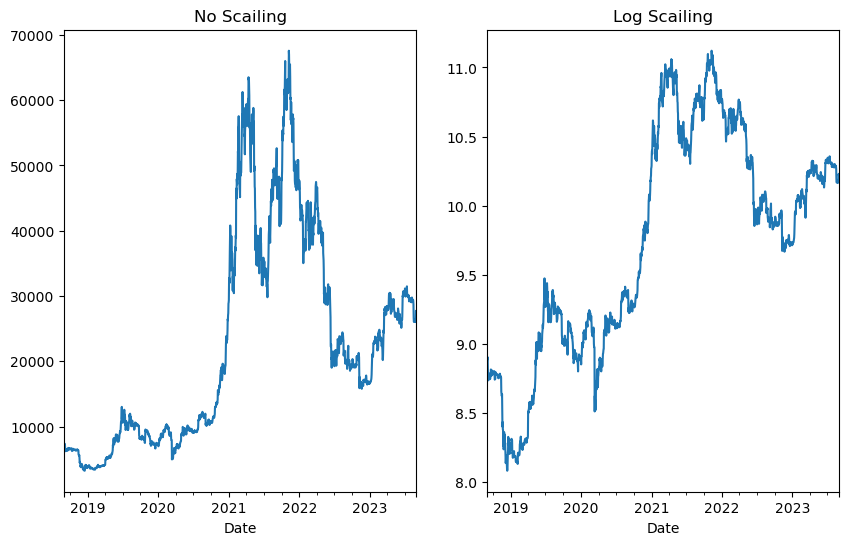

In [84]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
bitc_df['Close'].plot()
plt.title('No Scailing')

plt.subplot(1,2,2)
np.log1p(bitc_df['Close']).plot()
plt.title('Log Scailing')

Analyse average close price by Year/Quarter/Month/Day

Text(0.5, 1.0, 'Daily Average Price')

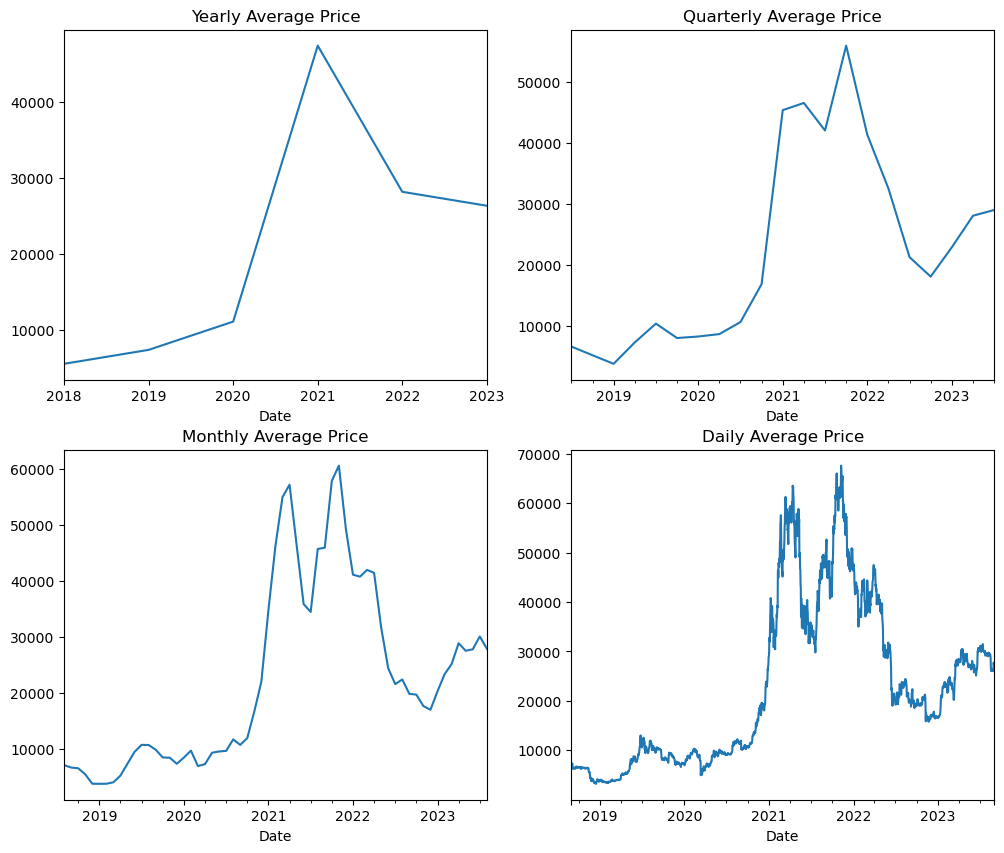

In [85]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
bitc_df['Close'].resample('Y').mean().plot()
plt.title('Yearly Average Price')

plt.subplot(2,2,2)
bitc_df['Close'].resample('Q').mean().plot()
plt.title('Quarterly Average Price')

plt.subplot(2,2,3)
bitc_df['Close'].resample('M').mean().plot()
plt.title('Monthly Average Price')

plt.subplot(2,2,4)
bitc_df['Close'].resample('D').mean().plot()
plt.title('Daily Average Price')

Analyse price change in recent 3 months

In [86]:
bitc_recent_3m = bitc_df[-92:]

In [87]:
bitc_recent_3m.reset_index(inplace = True)

In [97]:
bitc_recent_3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    92 non-null     datetime64[ns, UTC]
 1   Open    92 non-null     float64            
 2   High    92 non-null     float64            
 3   Low     92 non-null     float64            
 4   Close   92 non-null     float64            
 5   Volume  92 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 4.4 KB


In [89]:
init_notebook_mode(connected=True)
cf.go_offline()

In [90]:
can_data = go.Candlestick(x = bitc_recent_3m['Date'],
               open = bitc_recent_3m['Open'],
               high = bitc_recent_3m['High'],
               low = bitc_recent_3m['Low'],
               close = bitc_recent_3m['Close'])
layout = {'title':'Bitcoin price change from Jun - Aug 2023'}

In [91]:
can_fig = go.Figure(data = can_data, layout = layout)

In [92]:
can_fig

Analyse percentage change of close price

In [93]:
bitc_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-31 00:00:00+00:00,6973.970215,7057.169922,6920.160156,7037.580078,4495650000
2018-09-01 00:00:00+00:00,7044.810059,7242.290039,7038.049805,7193.250000,4116050000
2018-09-02 00:00:00+00:00,7189.580078,7306.310059,7132.160156,7272.720215,4329540000
2018-09-03 00:00:00+00:00,7279.029785,7317.939941,7208.149902,7260.060059,4087760000
2018-09-04 00:00:00+00:00,7263.000000,7388.259766,7255.439941,7361.660156,4273640000


In [94]:
bitc_df['Close_pct_change'] = bitc_df['Close'].pct_change()*100

In [95]:
bitc_df.head()

,Open,High,Low,Close,Volume,Close_pct_change
Date,,,,,,
2018-08-31 00:00:00+00:00,6973.970215,7057.169922,6920.160156,7037.580078,4495650000,NaN
2018-09-01 00:00:00+00:00,7044.810059,7242.290039,7038.049805,7193.250000,4116050000,2.211981
2018-09-02 00:00:00+00:00,7189.580078,7306.310059,7132.160156,7272.720215,4329540000,1.104789
2018-09-03 00:00:00+00:00,7279.029785,7317.939941,7208.149902,7260.060059,4087760000,-0.174077
2018-09-04 00:00:00+00:00,7263.000000,7388.259766,7255.439941,7361.660156,4273640000,1.399439


In [96]:
bitc_df['Close_pct_change'].iplot()

1. Bitcoin's price dropped massively by 37% on 12th March 2020, which is a result of the coronavirus outbreak
2. On 8th Feb 2021, Bitcoin's price has its biggest increase % in the past 5 years, as Tesla announced to buy $1.5 billion in bitcoin